____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Docente: Martin Palazzo__
____

# Importamos Librerías

In [ ]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing

In [ ]:
# Importamos librerias de PCA
from sklearn.decomposition import PCA

In [ ]:
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Importamos Dataset

In [ ]:
ls

2018/
clusterai_2019_clase06_dataset__credit.csv*
cluster_clase06_clustering_asignaciones.ipynb
cluster_clase06_clustering.ipynb
cluster_clase06_properati_caba.csv


In [ ]:
credit = pd.read_csv('/home/human/Dropbox/clusterai/clases/clase_06/clusterai_2019_clase06_dataset_credit.csv', delimiter=',')

In [ ]:
credit.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
credit.shape

(8950, 18)

# Preprocesamiento: Valores nulos

In [ ]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# como son pocas muestras con nulos decidimos quitar las filas que tienen algun valor nulo
credit = credit.dropna()

In [ ]:
# revisamos que ninguna columna tenga valores nulos
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
credit.shape

(8636, 18)

### Seleccionamos las features con las que deseamos trabajar
Observemos que la primer columna "CUST_ID" no nos sirve para realizar machine learning por eso la descartamos.

In [ ]:
x = credit.iloc[:,1:]

In [ ]:
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


### Pre procesamiento: Autoscaling
Realizamos un autoscaling con los datos, para todas las features. Como no tenemos train y test el standard scaler lo aplicamos a todo el dataset.

In [ ]:
scaler = preprocessing.StandardScaler().fit(x)
scaler

/home/human/Dropbox/doctorado/test/envs/keras_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# nuestros datos pre-procesados los guardamos en "xscal"
xscal = scaler.transform(x)  

/home/human/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Visualización de los datos post autoscaling

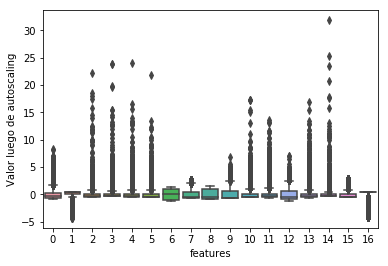

In [ ]:
# visualizamos nuestros datos luego del autoscaling
sns.boxplot(data = pd.DataFrame(xscal))
plt.xlabel("features")
plt.ylabel("Valor luego de autoscaling")
plt.show()

### PCA con datos luego de autoscaling

In [ ]:
# Generamos un PCA con los datos luego del autoscaling
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm
n_comps = 10
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

In [ ]:
#from sklearn.manifold import TSNE
#xtsne = TSNE(n_components=2).fit_transform(xscal)

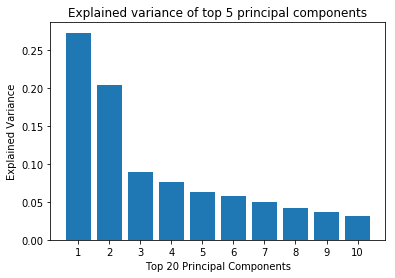

In [ ]:
# visualizamos las 10 primeras componentes principales del PCA
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

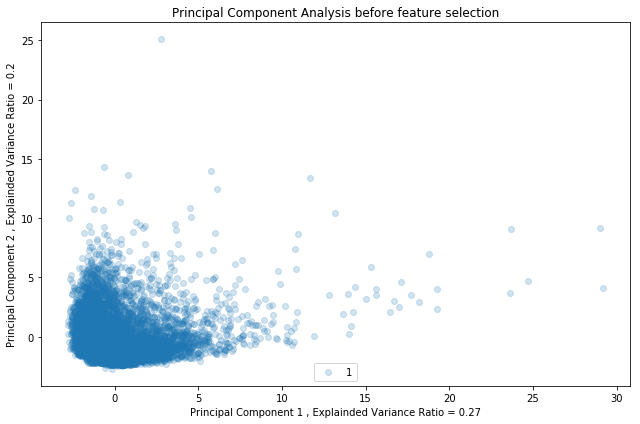

In [ ]:
# scatter plot de los datos solamente con las 2 primeras componentes principales de los datos
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

## Clustering con K Means
Utilizaremos la matriz de datos con las features originales luego de haber sido auto-escaladas.

In [ ]:
# Generamos un modelo de K means con 4 clusters con los datos autoscalados
kmeans = KMeans(n_clusters=4, random_state=0).fit(xscal)

In [ ]:
# una vez realizado el clusering, observamos las labels de cluster asignadas a cada muestra
kmeans.labels_

array([3, 0, 1, ..., 1, 3, 3], dtype=int32)

In [ ]:
# visualizamos los centroides finales de cada cluster. Como pedimos 4 clusters hay 4 centroides.
kmeans.cluster_centers_

array([[ 1.45717807,  0.3570326 , -0.24035644, -0.16960984, -0.25666667,
         1.69447064, -0.51302857, -0.22064562, -0.45527657,  1.73420755,
         1.61213161, -0.28916355,  0.85432735,  0.60908963,  0.49499572,
        -0.41838072, -0.11374525],
       [-0.32777031,  0.24629015,  0.110445  ,  0.00373089,  0.25405692,
        -0.3655212 ,  0.9752962 ,  0.32168527,  0.8661934 , -0.46461214,
        -0.36125583,  0.2968377 , -0.07285265, -0.14110257, -0.0905407 ,
         0.38800149,  0.05093181],
       [ 0.94725379,  0.44204179,  3.13368328,  2.72510988,  2.40101347,
        -0.15836507,  1.11798124,  1.77123784,  1.05044595, -0.33091934,
        -0.17576897,  2.99116134,  1.43570613,  1.94854361,  0.48550917,
         0.44737966,  0.31645831],
       [-0.25769159, -0.36658644, -0.34679106, -0.23391293, -0.38984603,
        -0.18267469, -0.80127693, -0.39390094, -0.71770776, -0.09139828,
        -0.15955779, -0.4779908 , -0.34515477, -0.26494772, -0.12243262,
        -0.25399704

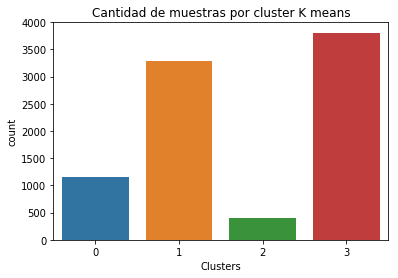

In [ ]:
# Contamos cuantas muestras quedaron en cada cluster
sns.countplot(kmeans.labels_)
plt.title("Cantidad de muestras por cluster K means")
plt.xlabel("Clusters")
plt.show()

In [ ]:
# realizamos el mismo PCA que antes aunque esta vez pintamos con colores cada cluster
n_comps = 10
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xscal))
eigenvalues = sklearn_pca.explained_variance_ratio_

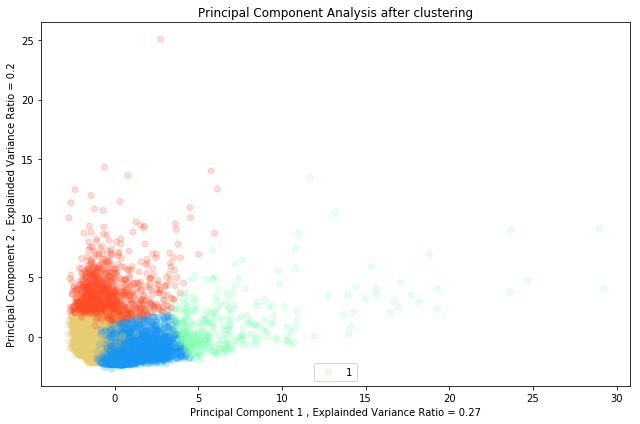

In [ ]:
# plot PCA
y_pca = np.reshape(np.array(kmeans.labels_),(len(kmeans.labels_),1))
col = np.zeros((len(y_pca[:,0]),4))
for t in range(len(y_pca[:,0])):
    if y_pca[t,0]==1:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.2, 0.4, 1)),(4,))
    elif y_pca[t,0]==0: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.9, 0.6, 1)),(4,))
    elif y_pca[t,0]==2:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.5, 0.6, 1)),(4,))
    elif y_pca[t,0]==3:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.7, 0.6, 1)),(4,))

plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], c=col, alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis after clustering')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

## Clustering Jerárquico (con scipy)

Generamos un clustering jerárquico. El linkage entre clusters será "ward" que implica "minimizes the variance of the clusters being merged".  Scipy lo utilizamos para visualizar el dendograma. 

In [ ]:
# la función dendogram de scipy ofrece visualización del dendograma
Z = linkage(xscal, 'ward')

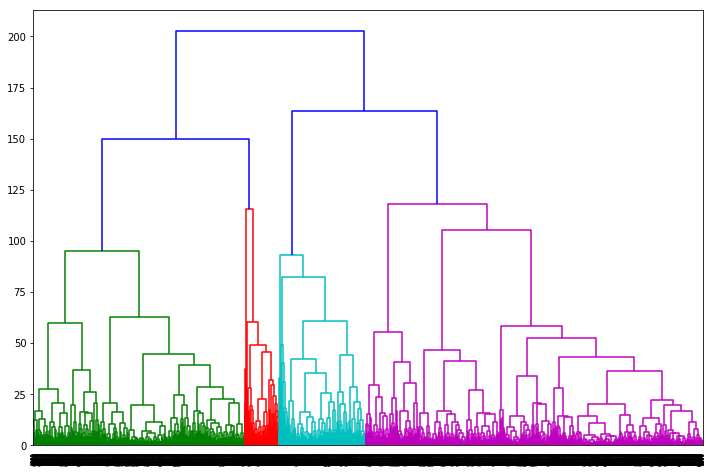

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.show()

## Clustering jerárquico con Scikit Learn

Generamos un clustering jerárquico con 4 clusters sobre nuestros datos.

In [ ]:
hierclus = AgglomerativeClustering(n_clusters=4).fit(xscal)

In [ ]:
# Observamos las labels de clusters asignadas a cada muestra
hierclus.labels_

array([0, 2, 3, ..., 0, 0, 0])

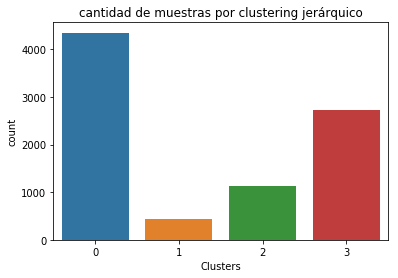

In [ ]:
# visualizamos en pantalla cuantas muestras quedaron en cada cluster
sns.countplot(hierclus.labels_)
plt.title("cantidad de muestras por clustering jerárquico")
plt.xlabel("Clusters")
plt.show()

## Medición de la calidad de clusters con Silhouette Score
Utilizando las etiquetas de clustering obtenidas por cada algoritmo computamos el Silhouette score para ver cuan "separados" estan los clusters obtenidos. Cuanto mas alto sea el silhouette score mejor la calidad de cluster obtenida.

In [ ]:
# Silhouette score utilizando las etiquetas obtenidas de K-means
metrics.silhouette_score(xscal, kmeans.labels_, metric='euclidean')

0.20976014086374142

In [ ]:
# Silhouette score utilizando las etiquetas obtenidas de Hierarchical clustering
metrics.silhouette_score(xscal, hierclus.labels_, metric='euclidean')

0.1626116943237927

# Asignación
Recién comparamos el Silhouette Score para ambos algoritmos con K = 4. Comparar para ambos algoritmos como evoluciona el Silhouette Score para distintos valores de clusters K = 2, 3, 4, 5, 6, 7.

In [ ]:
#### Codigo Aqui ####
#### Codigo Aqui ####
#### Codigo Aqui ####
#### Codigo Aqui ####